In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('C:/Users/Khush/Desktop/Datesets/cleaned_data.csv')

In [5]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.2, random_state=24
)

In [7]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,
                                rounded=True, feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

In [10]:
params_dict={'max_depth':[3,6,9,12],'n_estimators':[10,50,100,200]}
params_dict

{'max_depth': [3, 6, 9, 12], 'n_estimators': [10, 50, 100, 200]}

In [11]:
from sklearn.model_selection import GridSearchCV
gds=GridSearchCV(rf,param_grid=params_dict,verbose=2,cv=4)


In [12]:
gds.fit(X_train,y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=10, total=   0.5s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.4s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.4s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.5s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.1s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.4s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.3s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   2.1s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[CV] ................... max_depth=12, n_estimators=100, total=   9.7s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=  19.3s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=  19.1s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=  19.4s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=  22.0s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  6.7min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=4,
                                       

In [13]:
gds_res=pd.DataFrame(gds.cv_results_)
gds_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.415210,0.015219,0.021600,0.005808,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.815488,0.813801,0.825802,0.820330,0.818855,0.004672,11
1,2.127317,0.105625,0.091431,0.017699,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.813238,0.810988,0.817926,0.811515,0.813417,0.002733,15
2,3.687732,0.162385,0.138453,0.003218,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.813051,0.808926,0.820551,0.807577,0.812526,0.005053,16
3,7.063888,0.037865,0.281563,0.006661,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.815301,0.811551,0.818489,0.813953,0.814823,0.002506,14
4,0.606747,0.011408,0.018943,0.000050,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.819051,0.813988,0.825427,0.820518,0.819746,0.004077,10
5,2.872807,0.017714,0.081374,0.001498,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.818114,0.815113,0.826364,0.821643,0.820309,0.004191,8
6,5.750851,0.026446,0.157504,0.003108,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.818114,0.814926,0.826552,0.822018,0.820402,0.004349,6
7,11.435553,0.035036,0.317756,0.002581,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.817926,0.815113,0.826364,0.822206,0.820402,0.004269,5
8,0.805039,0.008264,0.021174,0.000462,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.815676,0.811926,0.827114,0.817704,0.818105,0.005599,12
9,4.032423,0.144999,0.100050,0.012102,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.818114,0.815301,0.826739,0.822018,0.820543,0.004300,4


In [14]:
gds.best_params_

{'max_depth': 12, 'n_estimators': 100}

In [15]:
xx, yy = np.meshgrid(range(5), range(5))
print(xx)
print(yy)
print(xx.shape)
print(yy.shape)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
(5, 5)
(5, 5)


In [16]:
gds_res_mean_ts_rs=gds_res['mean_test_score'].values.reshape(4,4)
gds_res_mean_ts_rs

array([[0.81885526, 0.813417  , 0.81252614, 0.81482346],
       [0.81974595, 0.82030853, 0.82040231, 0.82040232],
       [0.81810509, 0.82054294, 0.82077736, 0.82040231],
       [0.81618313, 0.81993338, 0.82105861, 0.82096482]])

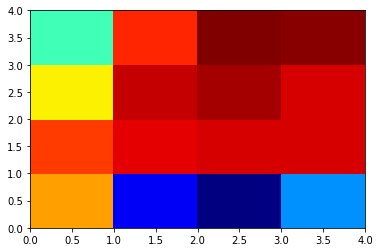

In [17]:
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)


Text(0, 0.5, 'Y coordinate')

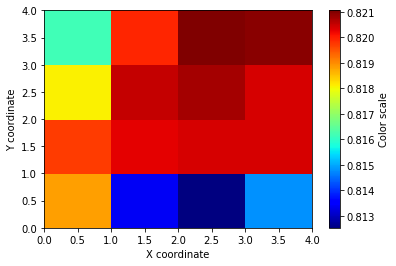

In [18]:
ax=plt.axes()
pcolor=ax.pcolormesh(xx,yy,gds_res_mean_ts_rs,cmap=plt.cm.jet)
plt.colorbar(pcolor, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')

In [19]:
gds_feat_imp=pd.DataFrame({'Features':features_response[:-1],'Importance':gds.best_estimator_.feature_importances_})
gds_feat_imp

,Features,Importance
0,LIMIT_BAL,0.060792
1,EDUCATION,0.012424
2,MARRIAGE,0.008014
3,AGE,0.043366
4,PAY_1,0.301435
5,BILL_AMT1,0.055073
6,BILL_AMT2,0.052267
7,BILL_AMT3,0.048582
8,BILL_AMT4,0.046898
9,BILL_AMT5,0.043089


In [20]:
gds_feat_imp.sort_values(by='Importance',ascending=False)

,Features,Importance
4,PAY_1,0.301435
0,LIMIT_BAL,0.060792
11,PAY_AMT1,0.060670
5,BILL_AMT1,0.055073
6,BILL_AMT2,0.052267
12,PAY_AMT2,0.050975
13,PAY_AMT3,0.048781
7,BILL_AMT3,0.048582
8,BILL_AMT4,0.046898
10,BILL_AMT6,0.045733
